## PART 2 of the Plassticc challenge homework: implement classification and clustring on the feature space you created in the previous homework

## this homework is split into 2. In the first part, due by Thursday 9th at noon, you will engineer features from time series. In the second half, due Thursday 16th at noon, you will use those features to find structure in the feature space (unsupervised learning, i.e. clustering) and classify by example with CART (supervised learning with random forest or gradient boosted tree models)

# Classifying astrophysical transients from photometry

In [0]:
# Author : P. Mondal
# Date : April 15, 2020 

In [1]:
import pandas as pd
import numpy as np
import pylab as pl

%pylab inline


Populating the interactive namespace from numpy and matplotlib


## OVERVIEW

The PLAsTiCC challend is a Kaggle challange to classify astrophysical objects (e.g. stars, exploding stars, stars with planets transiting, black holes) based on their time variability in the light emission in 6 different bands. The sampling (the cadence of the observations) is designed to show what the upcming Rubin Observatory LSST (Legacy Survey of Space and Time) will see when it starts observing (in 2023). 

You can refer to this notebook https://www.kaggle.com/michaelapers/the-plasticc-astronomy-starter-kit (written by my good riend Gautham Narayan in fact!) to get started and ingest and preprocess the PLASTiCC challenge data. However, this is written with a class (object oriented) and we have not talked about this syntax in class. If you are not familiar with classes do not worry about it (but you should learn them!). Also I do want you to extract the features yourself. So use it as a guideline, but do not just copy and paste.

Your task is to extract features, i.e. representations of the time series, and run 2 models on these feautes: a cluster model, and a classification tree. 

To limit confusion I removed the first part of the notebook. You can find it in https://github.com/fedhere/MLTSA_FBianco/tree/master/HW5 in the solution notebook


### make sure you deal with missing data

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")
%cd gdrive/My\ Drive
%ls *.npy

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive
featureshw5.npy  featureshw5_v2.npy


In [0]:
%ls *.npy
%ls allfeature_saved.csv
%ls MLTSA2020/allfeature_saved_Bianco.csv

featureshw5.npy  featureshw5_v2.npy
allfeature_saved.csv
MLTSA2020/allfeature_saved_Bianco.csv


In [0]:

 # allfeatures = np.load(open("featureshw5_v2.npy"), "r")
 feature_data = pd.read_csv('MLTSA2020/allfeature_saved_Bianco.csv');

In [4]:
feature_data.head()

,Unnamed: 0,"(0, 'mean')","(0, 'std')","(0, 'm2')","(0, 'm3')","(0, 'maxs')","(0, 'mins')","(0, 'median')","(0, 'slopes')","(0, 'intercepts')","(0, 'll1')","(0, 'll3')","(1, 'mean')","(1, 'std')","(1, 'm2')","(1, 'm3')","(1, 'maxs')","(1, 'mins')","(1, 'median')","(1, 'slopes')","(1, 'intercepts')","(1, 'll1')","(1, 'll2')","(1, 'll3')","(2, 'mean')","(2, 'std')","(2, 'm2')","(2, 'm3')","(2, 'maxs')","(2, 'mins')","(2, 'median')","(2, 'slopes')","(2, 'intercepts')","(2, 'll1')","(2, 'll2')","(2, 'll3')","(3, 'mean')","(3, 'std')","(3, 'm2')","(3, 'm3')","(3, 'maxs')","(3, 'mins')","(3, 'median')","(3, 'slopes')","(3, 'intercepts')","(3, 'll1')","(3, 'll2')","(3, 'll3')","(4, 'mean')","(4, 'std')","(4, 'm2')","(4, 'm3')","(4, 'maxs')","(4, 'mins')","(4, 'median')","(4, 'slopes')","(4, 'intercepts')","(4, 'll1')","(4, 'll2')","(4, 'll3')","(5, 'mean')","(5, 'std')","(5, 'm2')","(5, 'm3')","(5, 'maxs')","(5, 'mins')","(5, 'median')","(5, 'slopes')","(5, 'intercepts')","(5, 'll1')","(5, 'll2')","(5, 'll3')",decl,ddf_bool,hostgal_photoz,hostgal_photoz_err,target
0,0,-3.254554,83.944735,6934.865833,6934.865833,125.182808,-116.913223,-0.080537,0.005676,-0.175947,-84.013092,-1.0,-385.699911,601.787302,355904.026224,355904.026224,660.626343,-1100.440063,-0.170090,0.014032,-0.399902,-80.867915,-80.869998,-1.0,-134.146566,455.121346,203564.138816,203564.138816,611.984558,-681.858887,-0.289021,0.017676,-0.503760,-80.092803,-80.109763,-1.0,-121.103501,335.425053,110570.138947,110570.138947,445.737061,-530.644592,-0.122434,0.020475,-0.583524,-79.226482,-79.290039,-1.0,-55.954592,291.803449,83681.162283,83681.162283,381.953735,-422.184509,-0.163078,0.022343,-0.636786,-78.160027,-78.480261,-1.0,-47.449847,294.779522,85370.493377,85370.493377,378.188141,-422.815094,-0.129163,0.021319,-0.596932,-76.917754,-77.386461,-1.0,-61.9438,1,0.000,0.000,92
1,1,-2.720398,7.113509,49.879128,49.879128,14.509829,-14.735178,-0.052914,-0.041433,1.429423,-45.801483,-1.0,-1.019804,5.712334,32.048070,32.048070,9.129021,-11.715749,0.080189,-0.051648,1.420320,-36.052358,-38.161170,-1.0,-0.794238,5.770738,32.706748,32.706748,10.529041,-10.067919,0.117188,-0.053887,1.481892,-34.410798,-35.611095,-1.0,-0.986966,6.450413,40.864832,40.864832,11.330316,-12.394593,0.141552,-0.050983,1.402038,-38.701863,-41.302700,-1.0,-0.900262,6.406989,40.316483,40.316483,9.827934,-12.286801,0.016870,-0.050464,1.387765,-44.424807,-44.870314,-1.0,-1.794175,7.094073,49.427194,49.427194,14.770886,-14.211164,-0.094281,-0.037903,1.042343,-65.167686,-65.424297,-1.0,-27.7844,1,1.627,0.255,88
2,2,-0.048080,1.828872,3.298318,3.298318,5.942166,-3.459960,0.039463,-0.001798,0.063840,-101.249926,-1.0,0.141057,1.807229,3.203266,3.203266,5.693109,-3.393080,0.016754,0.003167,-0.080770,-72.910038,-73.012277,-1.0,2.400870,5.559483,30.313471,30.313471,20.994711,-2.848838,-0.343392,0.026905,-0.686084,-63.777334,-65.193298,1.0,3.236164,8.191987,65.818099,65.818099,33.572102,-5.435799,-0.314425,0.024491,-0.624531,-66.369632,-66.683538,1.0,4.308728,10.710344,112.462234,112.462234,41.159981,-5.836310,-0.308522,0.022552,-0.563811,-65.239486,-66.161110,1.0,4.539396,13.332758,174.276892,174.276892,47.310059,-19.159811,-0.149763,0.019612,-0.490299,-66.518080,-67.853917,1.0,-6.5796,1,0.226,0.016,42
3,3,1.797523,4.374445,18.869993,18.869993,18.014029,-3.874349,-0.169349,-0.013089,0.464675,-88.423048,-1.0,5.717394,25.964659,662.124902,662.124902,192.244293,-3.618410,-0.185994,-0.003826,0.105205,-76.313623,-78.932796,-1.0,9.711532,31.957997,1003.075853,1003.075853,220.795212,-2.159753,-0.290606,-0.003878,0.106641,-72.846380,-78.938052,-1.0,14.412924,34.967698,1200.905234,1200.905234,203.250702,-4.944036,-0.373246,-0.003931,0.108112,-67.105516,-78.945375,-1.0,13.134436,33.069053,1074.034376,1074.034376,183.633118,-15.494463,-0.358773,-0.004774,0.131296,-67.067827,-78.924149,-1.0,10.746138,26.060130,666.782529,666.782529,141.513290,-10.249387,-0.306851,-0.002816,0.076043,-64.783463,-77.536999,-1.0,-45.5867,1,0.281,1.152,

In [0]:
# -- personally I choose to drop the feature 
allfeatures = feature_data.replace([np.inf, -np.inf], np.nan).dropna(axis=1)


# PART II: I already guided you  through some of these tasks, but sort of "blindly". Start from here for part 2: we will reperform some of the tasks more thoughtfully (and correctly) and you will apply both clustering and classification to the PLASTiCC challenge data

# PART IIA : Preprocessing


## Task II.1: Preprocess your features by scaling them along the feature axis

Scale your training and test sets to remove the correlation: each feature is preprocessed so that it is mean=0 and standard deviation =1 - we will talk about it in class but make sure you deliver in this notebook the scaled features as below. Save the original mean and standard deviation for all features

**Deliverable II.1: the means and standard deviation arrays and the scaled features array**

**NOTE I HAD A MISTAKE IN THE NOTEBOOK LAST WEEK! you want to scale for the full set at once, and save the values of mean and standard deviation of the full set so you can preprocess future observations that are in nither sets the same way**



In [0]:
# Save the original mean and standard deviation for all features


In [6]:
allfeatures.shape

(7848, 77)

In [0]:
X = allfeatures.iloc[:,:-1].values
y = allfeatures.iloc[:,-1].values # last column of allfeatures dataframe

In [8]:
print(X.shape)
print(y.shape)

(7848, 76)
(7848,)


In [9]:
allfeatures.tail()

,Unnamed: 0,"(0, 'mean')","(0, 'std')","(0, 'm2')","(0, 'm3')","(0, 'maxs')","(0, 'mins')","(0, 'median')","(0, 'slopes')","(0, 'intercepts')","(0, 'll1')","(0, 'll3')","(1, 'mean')","(1, 'std')","(1, 'm2')","(1, 'm3')","(1, 'maxs')","(1, 'mins')","(1, 'median')","(1, 'slopes')","(1, 'intercepts')","(1, 'll1')","(1, 'll2')","(1, 'll3')","(2, 'mean')","(2, 'std')","(2, 'm2')","(2, 'm3')","(2, 'maxs')","(2, 'mins')","(2, 'median')","(2, 'slopes')","(2, 'intercepts')","(2, 'll1')","(2, 'll2')","(2, 'll3')","(3, 'mean')","(3, 'std')","(3, 'm2')","(3, 'm3')","(3, 'maxs')","(3, 'mins')","(3, 'median')","(3, 'slopes')","(3, 'intercepts')","(3, 'll1')","(3, 'll2')","(3, 'll3')","(4, 'mean')","(4, 'std')","(4, 'm2')","(4, 'm3')","(4, 'maxs')","(4, 'mins')","(4, 'median')","(4, 'slopes')","(4, 'intercepts')","(4, 'll1')","(4, 'll2')","(4, 'll3')","(5, 'mean')","(5, 'std')","(5, 'm2')","(5, 'm3')","(5, 'maxs')","(5, 'mins')","(5, 'median')","(5, 'slopes')","(5, 'intercepts')","(5, 'll1')","(5, 'll2')","(5, 'll3')",decl,ddf_bool,hostgal_photoz,hostgal_photoz_err,target
7843,7843,1.286655,15.998517,2.408965e+02,2.408965e+02,51.247578,-23.468113,-0.045003,0.010847,-0.086780,-23.432623,1.0,11.604012,42.103636,1.646094e+03,1.646094e+03,157.191650,-3.726851,-0.282994,0.056925,-0.370012,-18.558453,-18.584142,1.0,1.487066,9.781002,9.168183e+01,9.168183e+01,38.534805,-7.384562,-0.281585,0.009331,-0.107307,-33.397434,-33.524543,-1.0,4.696556,9.132244,8.006196e+01,8.006196e+01,23.924580,-10.646696,-0.245053,0.037509,-0.450103,-33.717240,-33.774233,1.0,-1.326906,16.735430,2.713223e+02,2.713223e+02,46.577839,-35.209919,-0.029408,-0.015218,0.235874,-43.831962,-44.493536,-1.0,20.073462,97.602719,9.254111e+03,9.254111e+03,517.602478,-105.375282,-0.091638,-0.021912,0.372506,-47.963730,-48.247356,1.0,-14.9403,0,0.000,0.000,65
7844,7844,24.635243,79.713932,5.824785e+03,5.824785e+03,271.930481,-22.168346,-0.264846,-0.062990,0.346445,-15.325622,-1.0,6.965825,16.268582,2.406062e+02,2.406062e+02,54.464066,-2.173342,-0.351126,-0.014109,0.070543,-13.870156,-15.035801,-1.0,-0.779640,4.606559,2.004148e+01,2.004148e+01,8.301914,-9.390373,0.066620,0.049441,-0.420251,-21.233756,-24.236322,-1.0,27.147503,88.177979,7.219973e+03,7.219973e+03,329.695709,-31.347395,-0.258221,-0.004290,0.027885,-18.617332,-19.342075,-1.0,40.758273,108.319727,1.126384e+04,1.126384e+04,363.402466,-43.322540,-0.331122,0.009737,-0.116845,-32.256807,-34.952720,-1.0,3.528390,38.849765,1.464913e+03,1.464913e+03,135.327408,-69.036392,-0.108422,-0.003058,0.050458,-47.569288,-47.724129,-1.0,-62.6967,0,2.561,1.115,90
7845,7845,-0.282914,46.605187,2.004963e+03,2.004963e+03,52.152622,-135.602631,0.164351,-0.057516,0.345093,-17.372063,1.0,-20.094296,23.572412,5.229728e+02,5.229728e+02,9.115225,-90.300354,0.081505,0.109119,-0.872951,-20.286207,-20.647956,-1.0,-28.388796,29.855715,8.542236e+02,8.542236e+02,27.459307,-80.965820,-0.023363,-0.004481,0.051530,-32.714050,-33.536138,-1.0,-13.723449,31.491707,9.333907e+02,9.333907e+02,60.889641,-69.581696,0.076775,-0.128830,1.030637,-18.241627,-18.246123,1.0,-15.201844,22.364118,4.845240e+02,4.845240e+02,37.266300,-49.501961,-0.107204,0.010708,-0.165973,-44.623068,-44.623897,-1.0,-9.838345,48.309960,2.258567e+03,2.258567e+03,169.916672,-87.510719,-0.026542,0.003563,-0.053441,-43.413986,-43.476462,-1.0,-55.6821,0,0.000,0.000,16
7846,7846,3.374208,14.420201,1.930892e+02,1.930892e+02,37.959984,-11.813696,-0.350661,0.019048,-0.123810,-19.054708,1.0,28.342250,97.513710,8.644476e+03,8.644476e+03,322.255371,-5.291557,-0.302563,0.121633,-0.608166,-14.032730,-14.391069,1.0,0.618994,6.550608,4.119405e+01,4.119405e+01,26.298336,-7.638723,-0.006650,0.022282,-0.267382,-33.485612,-34.352386,-1.0,-0.357920,7.667434,5.643796e+01,5.643796e+01,17.559683,-18.320801,-0.180631,0.005771,-0.069255,-34.042860,-34.953025,-1.0,-1.135067,10.112169,9.872990e+01,9.872990e+01,17.072502,-23.747828,0.083647,-0.011086,0.155199,-38.567032,-40.557675,1.0,7.671389,44.169662,1.902185e+03,1.902185e+

Save the original mean and standard deviation for all features






In [10]:
featuremeans = X.mean(axis = 0)
featurestd = X.std(axis=0)
print("saved means and standard deviation arrays", featuremeans, featurestd)
print("number of observcations {}, features {}, means {}, standard deviations {}".format(
    *X.shape, featuremeans.shape[0], featurestd.shape[0]))

saved means and standard deviation arrays [ 3.92350000e+03  3.92737631e+01  2.18255899e+02  1.17402466e+08
  1.17402466e+08  5.23882191e+02 -2.47707666e+02 -7.30978852e-02
  3.24319722e-04  6.37471557e-03 -3.23450251e+01  8.15494393e-03
  2.96187944e+01  1.88291251e+02  1.26600038e+06  1.26600038e+06
  3.87999042e+02 -1.88841777e+02 -1.58191816e-01 -4.47031168e-03
  2.58871203e-02 -2.76154819e+01 -2.96436596e+01  5.37716616e-02
  4.29330082e+01  2.04791323e+02  3.54331510e+06  3.54331510e+06
  4.84962221e+02 -2.16683247e+02 -2.01574134e-01 -2.48675518e-03
  3.19192091e-02 -3.65387768e+01 -3.96869617e+01  8.53720693e-02
  4.42794190e+01  1.98862866e+02  4.83654718e+06  4.83654718e+06
  4.76626366e+02 -1.95807404e+02 -1.94071059e-01 -1.69153033e-03
  2.11262820e-02 -3.56182235e+01 -3.88739946e+01  6.85524975e-02
  3.08623239e+01  2.04063537e+02  4.46795407e+06  4.46795407e+06
  5.38815350e+02 -2.13475481e+02 -1.69135766e-01  6.93903055e-04
 -3.41830907e-03 -4.34667982e+01 -4.67233499e+01

In [14]:
print(featuremeans.shape)

(76,)


**The scaled features array** \\
i.e. mean  = 0 and std  = 1

In [15]:
from sklearn import preprocessing
# Setting mean to zero and dividing by std in preprocessing 
X_scaled = preprocessing.scale(X)

print("scaled training data feature mean and standard deviations: ", 
      X_scaled.mean(axis=0), X_scaled.std(axis=0))



scaled training data feature mean and standard deviations:  [ 0.00000000e+00  2.71614196e-18  2.71614196e-18  2.71614196e-18
  2.71614196e-18  5.43228391e-18 -1.81076130e-18  1.44860904e-17
  1.44860904e-17  1.81076130e-18  1.15888723e-16  6.51874070e-17
  8.60111619e-18 -2.94248712e-18 -3.62152261e-18 -3.62152261e-18
 -9.95918717e-18  1.35807098e-17 -8.69165426e-17 -2.35398970e-17
 -9.05380652e-18 -1.15888723e-16 -1.15888723e-16 -2.53506583e-17
 -2.71614196e-18 -5.77180166e-18 -1.81076130e-18 -1.81076130e-18
  1.04118775e-17  1.81076130e-18  7.24304522e-18  1.26753291e-17
  1.81076130e-18 -2.89721809e-16 -4.63554894e-16  8.32950200e-17
 -4.52690326e-18 -5.43228391e-18 -9.05380652e-19 -9.05380652e-19
  2.26345163e-18 -1.26753291e-17 -7.24304522e-17 -1.85603034e-17
  1.35807098e-18  1.73833085e-16 -2.31777447e-16  7.24304522e-18
 -9.05380652e-19  3.16883228e-18  1.81076130e-18  1.81076130e-18
 -1.49387808e-17  1.99183743e-17  4.34582713e-17  1.62968517e-17
 -3.44044648e-17  0.00000000e+


# Task II.2: You already did this in part I: you do not have to do it again if you are satisfied with what you did, but rerun this since you redid the scaling of the features: Visualize a large dimensional feature space to plan the analysis and produce a 2D t-SNE projection of your feature space and visualize it. 
If you are lucky, this will be a pretty plot!
a great model to **Visualize** structure in data is  t-SNE: t-distributed Stocastic Neighbourhood Embedding
It project N-dimensional data on a 2-dimensional surface preserving the N-dimensional distance. If thre is structure in the feature space, it should show. If there is structure in feature space, clustering is a promising technique.


In [0]:
from sklearn.manifold import TSNE
import pylab as pl

(7848, 2)


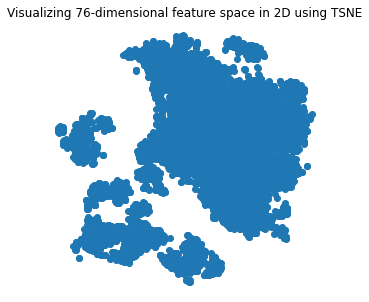

Figure: the 2D projection of the ~76-dimensional feature space we created by extracting features from the time series. The separation of the objects in the t-distribution based stocastic neighbourhood embedding (t-SNE) is promising: t-SNE is an embedding (a transformation to a different coordinate space) which is designed to preserve Eucledianpairwise distances existing in the higher dimensional parameter space. How many clusters can you see in this embedding?A note: since the t_SNE produces a projection of the feature space on an ideal set of coordinates, this is the only cxase in which you are allowed not to label your axes!


In [24]:
X_embedded = TSNE(n_components=2, random_state=345).fit_transform(X_scaled)
print(X_embedded.shape)
pl.figure(figsize=(5,5))
pl.scatter(X_embedded[:,0], X_embedded[:,1])
pl.title('Visualizing 76-dimensional feature space in 2D using TSNE')

pl.axis('off')
pl.show()
# pl.title('Visualizing 76-dimensional feature space in 2D using TSNE')
print("Figure: the 2D projection of the ~76-dimensional feature space we created"+
      " by extracting features from the time series. " + 
      "The separation of the objects in the t-distribution based stocastic neighbourhood embedding (t-SNE) is promising: " + 
      "t-SNE is an embedding (a transformation to a different coordinate space) which is designed to preserve Eucledian" + 
      "pairwise distances existing in the higher dimensional parameter space. " + 
      "How many clusters can you see in this embedding?" + 
      "A note: since the t_SNE produces a projection of the feature space on an ideal set of coordinates, " + 
      "this is the only cxase in which you are allowed not to label your axes!")


Fig 1 : 2D projection of $76$-dimensional feature space we created by extracting features from time series using TSNE method and $n_{components} = 2$. The method preserves euclidean distance between data points in higher dimension.

An example for understanding how TSNE works:

    Imagine the 3 points of an equilateral triangle (in 2d-space)
        Every pair of points has the same distance
    Try to map this to a 1-dimensional sequence (number line)
        It's not possible to keep the pairwise distances

The task of T-SNE and others is: map these point to some lower-dimensional space while keeping the distances visually so that we humans grasp some information hidden in many dimensions.

**How many clusters can you see in this embedding?**

Ans : Since the data is not colorcoded, I see only one cluster. 

**We have to assure that the clusters map to the target variable tho. So I will**


**redo the plot colorcoded by target variable**

7848 (7848, 2)
(7848,)


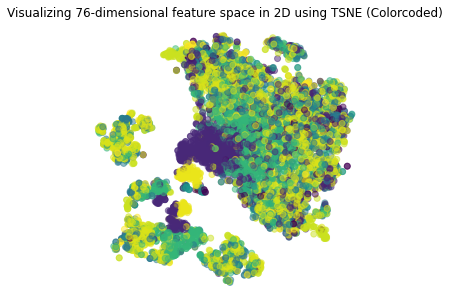

In [25]:
norm_obj= Normalize(vmin=y.min(), vmax=y.max())
print(len([c for c in pl.cm.RdBu_r(norm_obj(y))]), X_embedded.shape)
print(norm_obj(y).shape)
pl.figure(figsize=(5,5))
pl.title('Visualizing 76-dimensional feature space in 2D using TSNE (Colorcoded)')
pl.axis('off')
pl.scatter(X_embedded[:,0], X_embedded[:,1],  
           color=[c for c in pl.cm.viridis(norm_obj(y))], alpha=0.5);


Fig2: the purity of the sample is not good in the t-SNE projection against the target variable. The colors are mixed in most t-SNE clusters, the highest purity is achieved near the center of the projected feature space. **This is not a particularly promising situation**

Does this map better on other features in the metadata?



**Deliverable II.2: make your version of the plot below, and discuss your own result, which will likely be somewhast different from mine. Do you see any other insightful mapping of the features in the t-SNE projection?**

In [26]:
metadata = pd.read_csv("data/plasticc_train_metadata.csv.gz")
metadata.head()

,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_target,true_submodel,true_z,true_distmod,true_lensdmu,true_vpec,true_rv,true_av,true_peakmjd,libid_cadence,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,92,92,1,0.000,0.000,0.000,0.0,0.0,0.0,59570.000,69,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,88,88,1,1.817,45.703,0.000,0.0,0.0,0.0,59570.000,34,108.7,117.7,119.9,149.6,147.9,150.5
2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,42,42,2,0.233,40.328,0.004,4.5,0.0,0.0,60444.379,9,0.0,0.0,0.0,0.0,0.0,0.0
3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,90,90,1,0.301,40.969,-0.004,257.7,0.0,0.0,60130.453,38,0.0,0.0,0.0,0.0,0.0,0.0
4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,90,90,1,0.193,39.866,-0.002,-368.8,0.0,0.0,60452.641,1,0.0,0.0,0.0,0.0,0.0,0.0


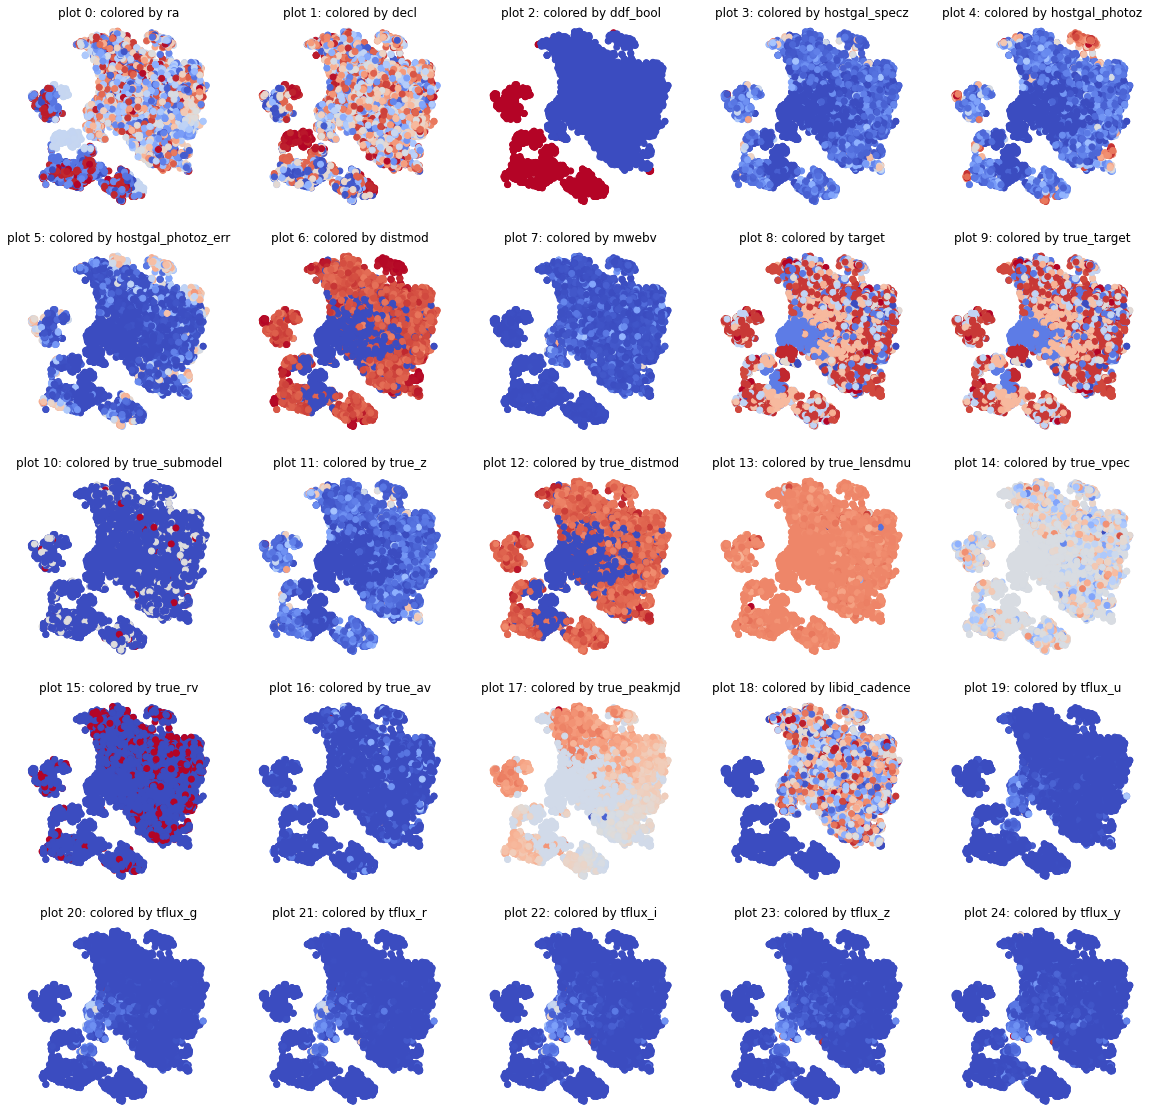

In [27]:
fig = pl.figure(figsize=(20,20))
# note: I am avoiding the first column of metadata which is the object identifier
for i, col in enumerate(metadata.columns[1:]):
    ax = fig.add_subplot(5,5,i+1)
    v = metadata[col].astype(float)
    ax.set_title("plot %d: colored by %s"%(i,col))
    ax.scatter(X_embedded[:,0], X_embedded[:,1],  
               color=[pl.cm.coolwarm(Normalize(vmin=v.min(), vmax=v.max())(c))
                                                         for c in v])
    ax.axis('off')

    #pl.show()

Fig3 : the feature space is projected on a 2D plane via t-SNE method, and the points are colorcoded by the value of all metadata: this includes features used in the feature space as well as features that are not used in the feature space. The fueature space t-SNE projection does not map the metadata, except for the survey: **row 1 and column 3** the data includes a DeepDrillingField survey and a regular survey (called wide-fast-deep) which include different observation strategy decisions (data collection strategy). Those are obviously affecting the data features this the clear split of the cluster in row 1 column 3.  (The deep drilling fields are special regions of the sky that would be observed more frequently, a whole bunch of times in one night. So even if an object were the same kind of object the extracted features could be very different!).

Most other features map the t-SNE projection more poorly. 


Note : Here we took a $76$-dimensional feature space and embedded the features into 2D and tried find features that map the embedded features into well defined cluster. Only **row 1 and column 3** shows clear clustering on embedded data. 

# PART IIB : Clustering 
## cluster the data using Agglomerative and DBscan. 
    


In [0]:
from sklearn.cluster import AgglomerativeClustering


Here is how I could cluster the data using the Euclidian distance with Agglomeratie Clustering stoopping the algorithm at 3 clusters. The Eucledian distance is the default for this (and most other) clustering algorithms implemented in sklearn. 

- Note: I can use the Eucledian distance **because** I preprocessed the feature space and all features have the same standard deviation!* 

- Note: the AgglemerativeClustering implementation in python allows to specify the number of clusters (I will use 3): the agglomeration will stop there for efficiency, this is not the same as having to specify the number of clusters in k-means, where the result depends on the number of clusters. In agglomerative clustering the following clusters would be segmentations of the first 2. 



In [30]:
X_scaled.shape

(7848, 76)

Agglomerative algorithm to obtain $3$ cluster from dataset

elements in cluster 0 5776
elements in cluster 1 1
elements in cluster 2 2071

colors : (7848, 4)


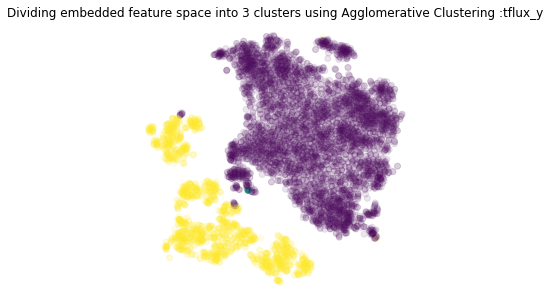

Figure: clustering the 76 dimensional feature space based on Agglomerateive Clustering algorithm with Eucledian distance into 3 clustersThere are 2 clusters of several observations, mapping excellently to the t-SNE projectionOne cluster of one indicates the presence of an outlier


In [42]:
# Where does is she specifying euclidian distance
# Ans : It's default. 

clustering = AgglomerativeClustering(n_clusters=3).fit(X_scaled)

for j in range(3):
    print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))
print()

pl.figure(figsize=(5,5))
pl.title('Dividing embedded feature space into 3 clusters using Agglomerative Clustering :' + str(col))

#using a color map normalized according to the number of clusters:
# for 3 clusters vmin=0, vmax=2
colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                                 for c in clustering.labels_])
print('colors :',colors.shape)
# changing the alpha (transparency) based on the number of objects in the 
# cluster or some clusters would not be visible
alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 
                                       else 1.0 for j in clustering.labels_])
# setting the alpha channel by replacing the default of the colormap which is 1
# Last column of colors (viridis is transparency i.e. alpha)
colors[:,3] = alpha 
    
pl.scatter(X_embedded[:,0], X_embedded[:,1], # alpha = alpha,
               color=colors);
pl.axis('off')
pl.show()
print("Figure: clustering the 76 dimensional feature space based on " + 
      "Agglomerateive Clustering algorithm with Eucledian distance into 3 clusters" + 
     "There are 2 clusters of several observations, mapping excellently to the t-SNE projection" + 
     "One cluster of one indicates the presence of an outlier")



Fig 4 : Clustering of 2D embedded feature space using Agglomerative clustering method. The color is normalized according to number of clusters (i.e. 3 here) and transparency is also adjusted. We see three clusters with $2^{nd}$ cluster with a single point which can be identified as outlier.

## TASK II.3:  Use AgglomerativeClustering in sklearn allows to select the number of cluster, run AgglomearativeCLustering with 2,3,4,5,6 clusters with Eucledian distance. Comment on the results.

**Deliverable II.3: plot the clusters obtained with AgglomerativeClustering with n_custer 2...6 and Eucledian distance, and comment on the result (mapping on t-SNE, outliers, consistence between the results obtained with different number of clusters)**


In [0]:
"""
# Test
clustering2 = {}
clustering2 = AgglomerativeClustering(n_clusters=2).fit(X_scaled)
for j in range(2):
    print("elements in cluster {} {}".format(j, (clustering2.labels_ == j).sum()))
print()
"""

elements in cluster 0 7847
elements in cluster 1 1



In [0]:
"""
for n in range(2,7):
  print(n)
"""

2
3
4
5
6


No. of clustering we want :  2
elements in cluster 0 7847
elements in cluster 1 1
Outlier detected : cluster no. and no. of elements are 1 1
Position of the row that contributed as outlier is : (array([3710]),)
The corresponding row (data) from metadata is :        object_id        ra    decl  ...   tflux_i   tflux_z   tflux_y
3710   36551205  307.0898 -1.7908  ...  146429.2  166923.3  184646.7

[1 rows x 26 columns]


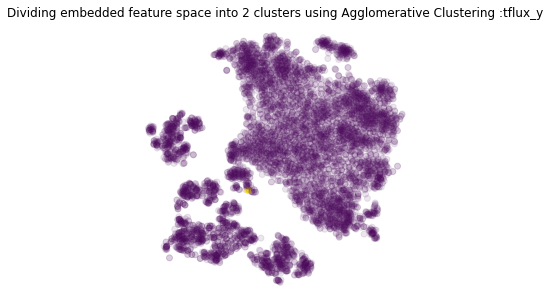

No. of clustering we want :  3
elements in cluster 0 5776
elements in cluster 1 1
Outlier detected : cluster no. and no. of elements are 1 1
Position of the row that contributed as outlier is : (array([3710]),)
The corresponding row (data) from metadata is :        object_id        ra    decl  ...   tflux_i   tflux_z   tflux_y
3710   36551205  307.0898 -1.7908  ...  146429.2  166923.3  184646.7

[1 rows x 26 columns]
elements in cluster 2 2071


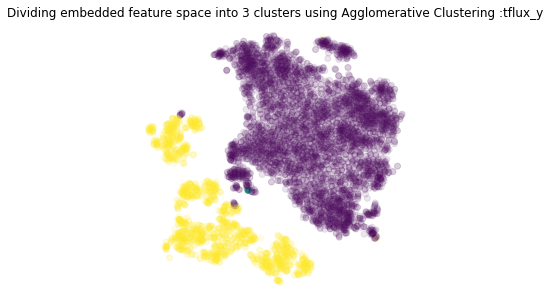

No. of clustering we want :  4
elements in cluster 0 5775
elements in cluster 1 1
Outlier detected : cluster no. and no. of elements are 1 1
Position of the row that contributed as outlier is : (array([7317]),)
The corresponding row (data) from metadata is :        object_id        ra     decl  ...  tflux_i  tflux_z  tflux_y
7317  118664463  130.9919 -43.6057  ...   9041.8  11978.0  14381.9

[1 rows x 26 columns]
elements in cluster 2 2071
elements in cluster 3 1
Outlier detected : cluster no. and no. of elements are 3 1
Position of the row that contributed as outlier is : (array([3710]),)
The corresponding row (data) from metadata is :        object_id        ra    decl  ...   tflux_i   tflux_z   tflux_y
3710   36551205  307.0898 -1.7908  ...  146429.2  166923.3  184646.7

[1 rows x 26 columns]


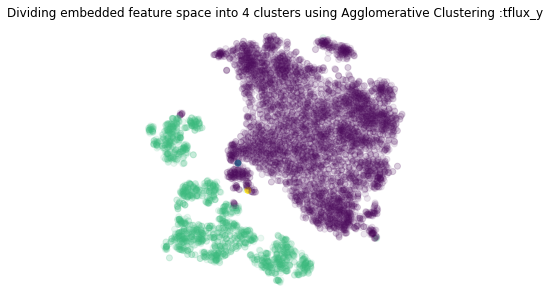

No. of clustering we want :  5
elements in cluster 0 4415
elements in cluster 1 1360
elements in cluster 2 2071
elements in cluster 3 1
Outlier detected : cluster no. and no. of elements are 3 1
Position of the row that contributed as outlier is : (array([3710]),)
The corresponding row (data) from metadata is :        object_id        ra    decl  ...   tflux_i   tflux_z   tflux_y
3710   36551205  307.0898 -1.7908  ...  146429.2  166923.3  184646.7

[1 rows x 26 columns]
elements in cluster 4 1
Outlier detected : cluster no. and no. of elements are 4 1
Position of the row that contributed as outlier is : (array([7317]),)
The corresponding row (data) from metadata is :        object_id        ra     decl  ...  tflux_i  tflux_z  tflux_y
7317  118664463  130.9919 -43.6057  ...   9041.8  11978.0  14381.9

[1 rows x 26 columns]


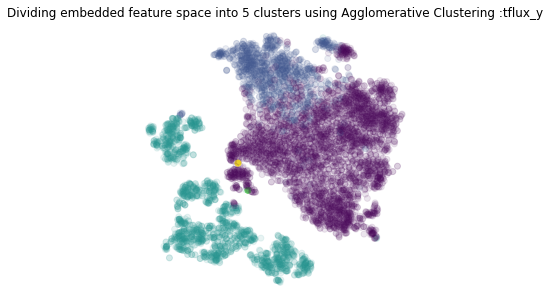

No. of clustering we want :  6
elements in cluster 0 326
elements in cluster 1 1360
elements in cluster 2 4089
elements in cluster 3 1
Outlier detected : cluster no. and no. of elements are 3 1
Position of the row that contributed as outlier is : (array([3710]),)
The corresponding row (data) from metadata is :        object_id        ra    decl  ...   tflux_i   tflux_z   tflux_y
3710   36551205  307.0898 -1.7908  ...  146429.2  166923.3  184646.7

[1 rows x 26 columns]
elements in cluster 4 1
Outlier detected : cluster no. and no. of elements are 4 1
Position of the row that contributed as outlier is : (array([7317]),)
The corresponding row (data) from metadata is :        object_id        ra     decl  ...  tflux_i  tflux_z  tflux_y
7317  118664463  130.9919 -43.6057  ...   9041.8  11978.0  14381.9

[1 rows x 26 columns]
elements in cluster 5 2071


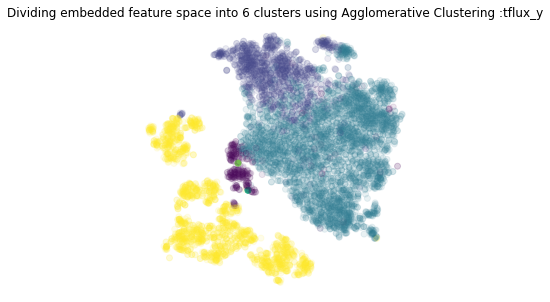

In [45]:
"""
The list of colors that comprise the colormap can be directly accessed 
# using the colors property, or it can be accessed indirectly by calling viridis
# with an array of values matching the length of the colormap. Note that the 
# returned list is in the form of an RGBA Nx4 array, where N is the length of
# the colormap.
"""
for n in range(2, 7):
  print('No. of clustering we want : ', n)
  clustering_n = {}
  clustering_n = AgglomerativeClustering(n_clusters = n).fit(X_scaled)
  # print(clustering_n.labels_)
  for j in range(n):
    print("elements in cluster {} {}".format(j, (clustering_n.labels_
                                                                  == j).sum()))

    num_elem = (clustering_n.labels_ == j).sum()
    # Identify the cluster as outlier if number of elements is less than 2
    if num_elem < 2:
      print('Outlier detected : cluster no. and no. of elements are', j, num_elem)
      out_arr = clustering_n.labels_
      pos_out = np.where(out_arr == j )
      print("Position of the row that contributed as outlier is :", pos_out)
      # print('Printing the row :', X_scaled[pos_out][:])
      print('The corresponding row (data) from metadata is : ', metadata.loc[pos_out] )

  
  pl.figure(figsize=(5,5))
  # pl.title(col)
  pl.title(('Dividing embedded feature space into {} clusters using ' + 
           'Agglomerative Clustering :' + str(col)).format(n))


  #using a color map normalized according to the number of clusters:
  # for 3 clusters vmin=0, vmax=2
  colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax= n-1)(c))
                                                 for c in clustering_n.labels_])
  #colors2 = np.array([pl.cm.viridis(Normalize(vmin=0, vmax= n)(c))
  #                                              for c in clustering_n.labels_])
  # print('color shape is ', colors2.shape, clustering_n.labels_.shape)

  # changing the alpha (transparency) based on the number of objects in the 
  # cluster or some clusters would not be visible
  alpha = np.array([0.1 if (clustering_n.labels_ == j).sum() > 200 else 1.0 
                                            for j in clustering_n.labels_])
  # setting the alpha channel by replacing the default of the colormap i.e. 1
  colors[:,3] = alpha
    
  pl.scatter(X_embedded[:,0], X_embedded[:,1], # alpha = alpha,
               color=colors);
  pl.axis('off')
  pl.show()
  





Fig 5: The figs above show clustering of embedded data into $2$, $3$, $4$, $5$,$6$ clusters using agglomerative algorithm. The color scheme is normalized depending on no. of clusters and transparency is changed depending on number of elements in each cluster. 

**comment on the result (mapping on t-SNE, outliers, consistence between the** **results obtained with different number of clusters**

Ans : Fig 5 shows embedded data (using t-SNE) clustered using Agglomerative algorithm. All the clusters i.e. $2$ to $6$ have a cluster with one element which is idendified as outlier. The **row** that contributes towards this outlier is printed along with its location. Whereas all clusterings are consistent in predicting row $3710$ as outlier, clustering $4$, $5$, $6$ create another cluster with element from **row ** no. $7317$. Clustering of atmax $3$ separates the embedded into separate cluster with one cliuster for no. of cluster less than $3$ and $2$ outliers for cluster no. greater than $3$.

In [0]:
  """
  n_out = 2
  clustering_outlr = AgglomerativeClustering(n_clusters=n_out).fit(X_scaled)
  labels = clustering_n.labels_
  
  for j in range(1, n_out):
    out_arr = clustering_n.labels_
    pos_out = np.where(out_arr == 1 )
    print("Position of the row that contributed as outlier is :", pos_out)
    print('Printing the row :', X_scaled[pos_out][:])
  """
    

Position of the row that contributed as outlier is : (array([3710]),)
Printing the row : [[-9.42387488e-02  3.71442785e+00  8.23117446e-01 -3.40144175e-03
  -3.40144175e-03  8.34585822e-01  5.73924299e-02 -2.82948120e+00
  -5.72595720e-01  5.16321785e-01  8.09799765e-01 -1.00818847e+00
   7.36897198e+01  6.17868817e+01  8.59898625e+01  8.59898625e+01
   6.23394809e+01  4.37414393e+00 -2.18094351e+00 -8.61939312e-01
   7.32500267e-01  9.37713024e-01  6.27804942e-01 -1.05529841e+00
   8.55425736e+01  8.12855921e+01  8.85266015e+01  8.85266015e+01
   7.87229535e+01  1.11881343e+01 -2.43872021e+00 -5.68890070e-01
   5.68691740e-01  1.39513898e+00  3.44501341e-01 -1.08934913e+00
   8.24730088e+01  8.31119266e+01  8.85513326e+01  8.85513326e+01
   8.17385674e+01  1.11544025e+01 -2.48162306e+00 -1.12557839e+00
   8.55061993e-01  1.62191148e+00  7.53410038e-01 -1.07107218e+00
   7.07890203e+01  7.85362359e+01  8.84005655e+01  8.84005655e+01
   7.93523886e+01  4.77144331e+00 -1.97688230e+00 -1.

In [0]:
# print('The corresponding row from metadata is : ', metadata.loc[pos_out] )

The corresponding row from metadata is :        object_id        ra    decl  ...   tflux_i   tflux_z   tflux_y
3710   36551205  307.0898 -1.7908  ...  146429.2  166923.3  184646.7

[1 rows x 26 columns]


In [0]:
# print(clustering_n)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)


In [0]:
"""
# Now you can extract all of your cluster 2 data points like so:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

X_clust = X_scaled[ClusterIndicesNumpy(1,clustering_n.labels_)]
print(X_clust[1])
"""

[-1.67488961  0.10943142  0.01666337 -0.01145706 -0.01145706  0.02432926
  0.0185     -2.82222305  0.31208548 -2.09794548 -1.23739096  0.99187804
  0.279468    0.26396783 -0.01885002 -0.01885002  0.43288018  0.19729786
 -1.57394701  0.44459926 -2.01593799 -0.57297178 -0.93321397  0.94759927
  0.14893368  0.18300405 -0.01236356 -0.01236356  0.2182748   0.22676257
 -1.55993056  0.94332459 -2.05897961  0.19330667 -0.56823658  0.91797934
  0.12394626  0.15702387 -0.01211022 -0.01211022  0.16417926  0.18383811
 -1.60605628  0.92358218 -2.09589462  0.41887754 -0.541829    0.93364389
  0.13960075  0.1526146  -0.01355011 -0.01355011  0.11696692  0.13160807
 -1.91766711  1.32523621 -2.22535748  1.19642794 -0.08653933  0.96247717
  0.09631054  0.10022551 -0.01352642 -0.01352642  0.08690456  0.10227563
 -2.39614334  1.55426052 -2.48531903  1.58236698  0.18242023  0.9748324
  1.09521696  1.64586898 -0.19409678  0.5170746 ]


## let's take a look at outliers: in the AgglomerativeClustering (n_cluster=2) there is one outlier**

No. of clustering we want :  2
elements in cluster 0 7847
elements in cluster 1 1
Outlier detected : cluster no. and no. of elements are 1 1
Position of the row that contributed as outlier is : (array([3710]),)
The corresponding row (data) from metadata is :        object_id        ra    decl  ...   tflux_i   tflux_z   tflux_y
3710   36551205  307.0898 -1.7908  ...  146429.2  166923.3  184646.7

[1 rows x 26 columns]


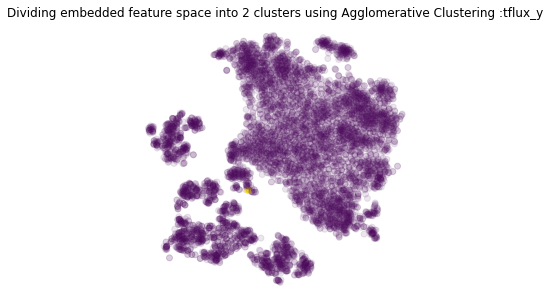

In [46]:
"""
The list of colors that comprise the colormap can be directly accessed 
# using the colors property, or it can be accessed indirectly by calling viridis
# with an array of values matching the length of the colormap. Note that the 
# returned list is in the form of an RGBA Nx4 array, where N is the length of
# the colormap.
"""
for n in range(2, 3):
  print('No. of clustering we want : ', n)
  clustering_n = {}
  clustering_n = AgglomerativeClustering(n_clusters = n).fit(X_scaled)
  # print(clustering_n.labels_)
  for j in range(n):
    print("elements in cluster {} {}".format(j, (clustering_n.labels_
                                                                  == j).sum()))

    num_elem = (clustering_n.labels_ == j).sum()
    # Identify the cluster as outlier if number of elements is less than 2
    if num_elem < 2:
      print('Outlier detected : cluster no. and no. of elements are', j, num_elem)
      out_arr = clustering_n.labels_
      pos_out = np.where(out_arr == j )
      print("Position of the row that contributed as outlier is :", pos_out)
      # print('Printing the row :', X_scaled[pos_out][:])
      print('The corresponding row (data) from metadata is : ', metadata.loc[pos_out] )

  
  pl.figure(figsize=(5,5))
  # pl.title(col)
  pl.title(('Dividing embedded feature space into {} clusters using ' + 
           'Agglomerative Clustering :' + str(col)).format(n))


  #using a color map normalized according to the number of clusters:
  # for 3 clusters vmin=0, vmax=2
  colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax= n-1)(c))
                                                 for c in clustering_n.labels_])
  #colors2 = np.array([pl.cm.viridis(Normalize(vmin=0, vmax= n)(c))
  #                                              for c in clustering_n.labels_])
  # print('color shape is ', colors2.shape, clustering_n.labels_.shape)

  # changing the alpha (transparency) based on the number of objects in the 
  # cluster or some clusters would not be visible
  alpha = np.array([0.1 if (clustering_n.labels_ == j).sum() > 200 else 1.0 
                                            for j in clustering_n.labels_])
  # setting the alpha channel by replacing the default of the colormap i.e. 1
  colors[:,3] = alpha
    
  pl.scatter(X_embedded[:,0], X_embedded[:,1], # alpha = alpha,
               color=colors);
  pl.axis('off')
  pl.show()
  





Fig 6: Clustering shown for $n_{clustering} = 2$ on embedded data. The $2^{nd}$ cluster is identified as outlier with contribution coming from **row** $3710$.

## Extra Credit 1: If you have clusters where you have single object in a cluster (e.g. in my Agglomerative Cluastering with n_cluster=2) try and figure out how why the object that is an outlier and isolated by your clustering model. 

I plotted all objects of the same type as the outlier in the 3-clusters result, but this was not very insightful. Can you do better?

## TASK II.4 what happens if I change the distance metric?

Create a new metric: precompute the braycurtis metric with scipy.spatial.distance.cdist and pass it to the accolmerative clustering with n_clusters=3 and affinity='precomputed'. Describe the result. Look online, on the documentation of scipy and on the any statistical resources (wikipedia has great pages on this) to describe the braycurtis distance.

**Deliverable: make a plot of the t-SNE projection colorcoded by the cluster obtained with the precomputed braycurtis distance and comment on whether it is consistent with the Eucledian distance clustering result.**

In [0]:
from scipy.spatial.distance import cdist

In [63]:
"""
print('Shape of reduced dimention of data using t-SNE : ', X_embedded.shape, 
                                                       X_embedded[:, 0].shape)

dist_v3 = cdist(np.atleast_2d(X_embedded[:, 0]).T, 
                        np.atleast_2d(X_embedded[:, 1]).T, metric='braycurtis')
print(dist_v3.shape)
"""

Shape of reduced dimention of data using t-SNE :  (7848, 2) (7848,)
(7848, 7848)


In [65]:
"""
Example :
precomputed agglomerative clustering
https://gist.github.com/codehacken/8b9316e025beeabb082dda4d0654a6fa
"""
# Obtaining precomputed distance metric using braycurtis method
# No, of cluster = 3
# Calculating distance metric
dist_v2 = cdist(X_scaled, X_scaled, metric='braycurtis')
clustering = AgglomerativeClustering(n_clusters=3, affinity='precomputed',
                                         linkage = 'complete').fit(dist_v2)

for j in range(2, -1, -1):
        print("elements in cluster {} {}".format(j, (clustering.labels_ 
                                                                 == j).sum()))
        


elements in cluster 2 1282
elements in cluster 1 4479
elements in cluster 0 2087


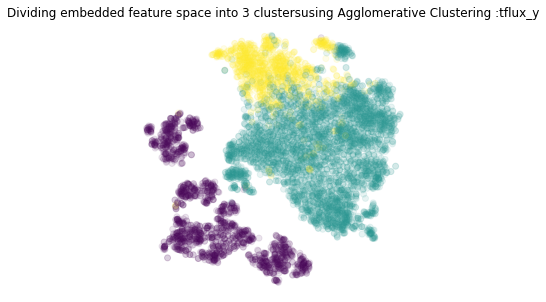

Figure: clustering the 76 dimensional feature space based on Agglomerateive Clustering algorithm with Eucledian distance into 3 clustersThere are 2 clusters of several observations, mapping excellently to the t-SNE projectionOne cluster of one indicates the presence of an outlier


In [66]:
pl.figure(figsize=(5,5))
pl.title('Dividing embedded feature space into 3 clusters' + 
                              'using Agglomerative Clustering :' + str(col))

#using a color map normalized according to the number of clusters:
# for 3 clusters vmin=0, vmax=2
colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                           for c in clustering.labels_])
# changing the alpha (transparency) based on the number of objects in the 
# cluster or some clusters would not be visible
alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 
                                        else 1.0 for j in clustering.labels_])
# setting the alpha channel by replacing the default of the colormap which is 1
colors[:,3] = alpha
    
pl.scatter(X_embedded[:,0], X_embedded[:,1], # alpha = alpha,
               color=colors);
pl.axis('off')
pl.show()
print("Figure: clustering the 76 dimensional feature space based on " + 
      "Agglomerateive Clustering algorithm with Braycurtis distance into 3 clusters" + 
     "All 3 clusters of several observationsare mapping excellently to the t-SNE projection")

Fig 7 : 2D clustered visualization of 76 dimensional feature data using Agglomerative method with distance metric calculated using **Braycurtis** method. Note the outlier cluster is gone and we see $3$ separate clusters. All 3 clusters of several observationsare mapping excellently to the t-SNE projection

No. of clustering we want :  2
elements in cluster 0 5761
elements in cluster 1 2087


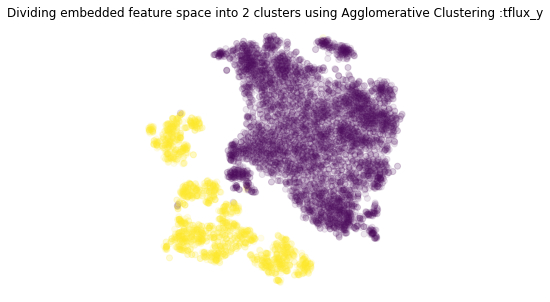

No. of clustering we want :  3
elements in cluster 0 2087
elements in cluster 1 4479
elements in cluster 2 1282


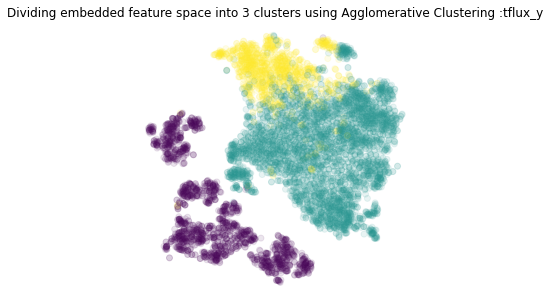

No. of clustering we want :  4
elements in cluster 0 4479
elements in cluster 1 1674
elements in cluster 2 1282
elements in cluster 3 413


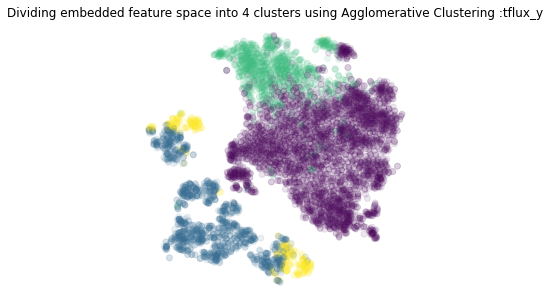

No. of clustering we want :  5
elements in cluster 0 2736
elements in cluster 1 1674
elements in cluster 2 1282
elements in cluster 3 413
elements in cluster 4 1743


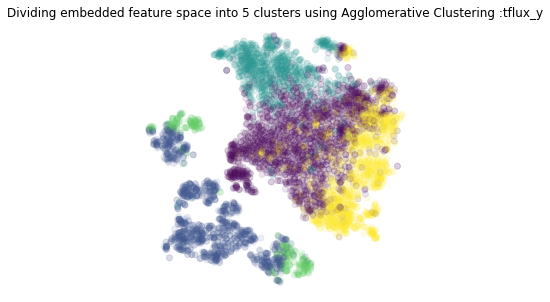

No. of clustering we want :  6
elements in cluster 0 1266
elements in cluster 1 1674
elements in cluster 2 1470
elements in cluster 3 413
elements in cluster 4 1743
elements in cluster 5 1282


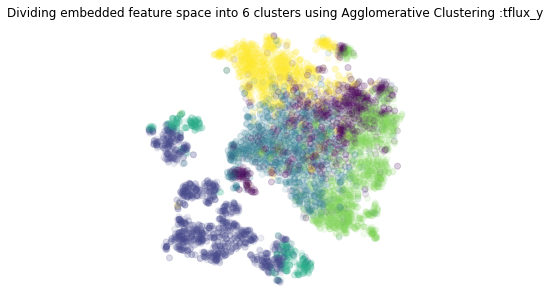

In [141]:
"""
The list of colors that comprise the colormap can be directly accessed 
# using the colors property, or it can be accessed indirectly by calling viridis
# with an array of values matching the length of the colormap. Note that the 
# returned list is in the form of an RGBA Nx4 array, where N is the length of
# the colormap.
"""
dist_v2 = cdist(X_scaled, X_scaled, metric='braycurtis')

for n in range(2, 7):
  print('No. of clustering we want : ', n)
  clustering_n = {}
  # Calculating distance metric
  clustering_n = AgglomerativeClustering(n_clusters = n, affinity='precomputed',
                                         linkage = 'complete').fit(dist_v2)


  # clustering_n = AgglomerativeClustering(n_clusters = n).fit(X_scaled)
  # print(clustering_n.labels_)
  for j in range(n):
    print("elements in cluster {} {}".format(j, (clustering_n.labels_
                                                                  == j).sum()))

    num_elem = (clustering_n.labels_ == j).sum()
    # Identify the cluster as outlier if number of elements is less than 2
    if num_elem < 2:
      print('Outlier detected : cluster no. and no. of elements are', j, num_elem)
      out_arr = clustering_n.labels_
      pos_out = np.where(out_arr == j )
      print("Position of the row that contributed as outlier is :", pos_out)
      # print('Printing the row :', X_scaled[pos_out][:])
      print('The corresponding row (data) from metadata is : ', metadata.loc[pos_out] )

  
  pl.figure(figsize=(5,5))
  # pl.title(col)
  pl.title(('Dividing embedded feature space into {} clusters using ' + 
           'Agglomerative Clustering :' + str(col)).format(n))


  #using a color map normalized according to the number of clusters:
  # for 3 clusters vmin=0, vmax=2
  colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax= n-1)(c))
                                                 for c in clustering_n.labels_])
  #colors2 = np.array([pl.cm.viridis(Normalize(vmin=0, vmax= n)(c))
  #                                              for c in clustering_n.labels_])
  # print('color shape is ', colors2.shape, clustering_n.labels_.shape)

  # changing the alpha (transparency) based on the number of objects in the 
  # cluster or some clusters would not be visible
  alpha = np.array([0.1 if (clustering_n.labels_ == j).sum() > 200 else 1.0 
                                            for j in clustering_n.labels_])
  # setting the alpha channel by replacing the default of the colormap i.e. 1
  colors[:,3] = alpha
    
  pl.scatter(X_embedded[:,0], X_embedded[:,1], # alpha = alpha,
               color=colors);
  pl.axis('off')
  pl.show()
  





Fig : The figures show different no. of cluster calculated with distance metric precomputed using braycurtis method. Unlike eucledian distance, clusters obtained using braycurtis distance method has no outlier.
Also, $n_{cluster} = 3$ separates data points into $3$ separate clustuers which shows that data are mapped well into 2D embedded feature space.

## Extra Credit II : Also cluster the original, not scaled features but use the Mahalanobis distance, which takes into account the variance of a feature and comment on the result. Is it consistent with the result using Eucledian distance on the scaled feature space

In [137]:

from statsmodels.tsa.stattools import grangercausalitytests
np.random.rand(4,2)
print((X.shape))
print(np.random.rand(len(X), len(X[1][:])).shape)
print((X + 0.001*np.random.rand(len(X), len(X[1][:]))).shape)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(7848, 76)
(7848, 76)
(7848, 76)


In [0]:
# Obtaining precomputed distance metric using braycurtis method
# No, of cluster = 3
# Calculating distance metric

# Since mahalanobis distance formula has denominator which is zero for identical dataset,
# any two too similar point from feature space will lead to singularity while 
# calculating Mahalanobis distance using cdist. One possible solution is to add 
# small random noise to second vector i.e. xB.

noise = np.random.rand(len(X), len(X[1][:]))
dist_Mbt = cdist(X, X + 0.01*noise, metric='mahalanobis', VI=None)


In [151]:
# Does dist_Mbt have a atleast one Nan
print(np.isnan(dist_Mbt).any())
dist_Mbt_2 = np.nan_to_num(dist_Mbt)
print(np.isnan(dist_Mbt_2).any())
print(dist_Mbt.shape)
print(dist_Mbt_2.shape)

True
False
(7848, 7848)
(7848, 7848)


In [0]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='precomputed',
                                         linkage = 'complete').fit(dist_Mbt_2)

In [153]:
for j in range(2, -1, -1):
        print("elements in cluster {} {}".format(j, (clustering.labels_ 
                                                                 == j).sum()))
        

elements in cluster 2 16
elements in cluster 1 27
elements in cluster 0 7805


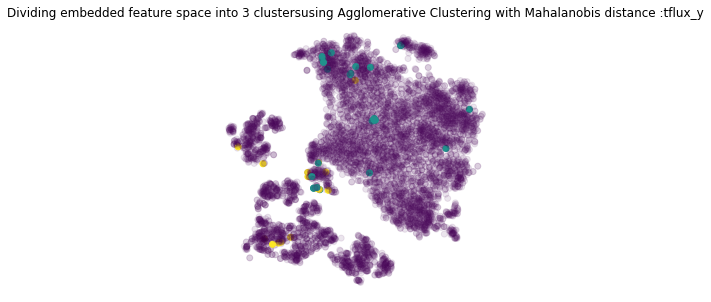

Figure: clustering the 76 dimensional feature space based on Agglomerateive Clustering algorithm with Braycurtis distance into 3 clustersAll 3 clusters of several observationsare mapping excellently to the t-SNE projection


In [154]:
pl.figure(figsize=(5,5))
pl.title('Dividing embedded feature space into 3 clusters' + 
       'using Agglomerative Clustering with Mahalanobis distance :' + str(col))

#using a color map normalized according to the number of clusters:
# for 3 clusters vmin=0, vmax=2
colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                           for c in clustering.labels_])
# changing the alpha (transparency) based on the number of objects in the 
# cluster or some clusters would not be visible
alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 
                                        else 1.0 for j in clustering.labels_])
# setting the alpha channel by replacing the default of the colormap which is 1
colors[:,3] = alpha
    
pl.scatter(X_embedded[:,0], X_embedded[:,1], # alpha = alpha,
               color=colors);
pl.axis('off')
pl.show()
print("Figure: clustering the 76 dimensional feature space based on " + 
      "Agglomerateive Clustering algorithm with Braycurtis distance into 3 clusters" + 
     "All 3 clusters of several observationsare mapping excellently to the t-SNE projection")

Fig : The figure above shows data clusturing using agglomerative algorithm with distance calculated using mahalanobis method. Note, here unprocessed data was used and due to singularity issue, small noise was added while calculating distance metric. The data are not well separated into three separate clusters.

In [139]:
"""
Mahalanobis distance
repeated for embedded data 
"""
noise = np.random.rand(len(X), len(X[1][:]))

dist_Mb = cdist(X_embedded, X_embedded, metric='mahalanobis', VI=None)
dist_Mb.shape



clustering = AgglomerativeClustering(n_clusters=3, affinity='precomputed',
                                         linkage = 'complete').fit(dist_Mb)

for j in range(2, -1, -1):
        print("elements in cluster {} {}".format(j, (clustering.labels_ 
                                                                 == j).sum()))
        

elements in cluster 2 1246
elements in cluster 1 3693
elements in cluster 0 2909


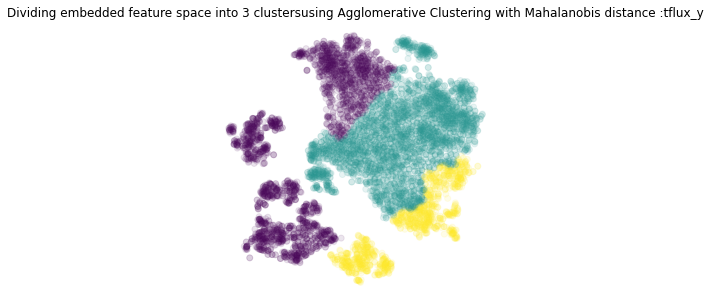

Figure: clustering the 76 dimensional feature space based on Agglomerateive Clustering algorithm with Braycurtis distance into 3 clustersAll 3 clusters of several observationsare mapping excellently to the t-SNE projection


In [140]:
pl.figure(figsize=(5,5))
pl.title('Dividing embedded feature space into 3 clusters' + 
       'using Agglomerative Clustering with Mahalanobis distance :' + str(col))

#using a color map normalized according to the number of clusters:
# for 3 clusters vmin=0, vmax=2
colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                           for c in clustering.labels_])
# changing the alpha (transparency) based on the number of objects in the 
# cluster or some clusters would not be visible
alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 
                                        else 1.0 for j in clustering.labels_])
# setting the alpha channel by replacing the default of the colormap which is 1
colors[:,3] = alpha
    
pl.scatter(X_embedded[:,0], X_embedded[:,1], # alpha = alpha,
               color=colors);
pl.axis('off')
pl.show()
print("Figure: clustering the 76 dimensional feature space based on " + 
      "Agglomerateive Clustering algorithm with Braycurtis distance into 3 clusters" + 
     "All 3 clusters of several observationsare mapping excellently to the t-SNE projection")

Fig : Clustering of data with distance calculated using Mahalanobis method.
This particular clustering method creates well separated $3$ clusters and map data to embedded data obtained using t-SNE method.

In [0]:
"""
print(dist_Mb.shape)
test = dist_Mb[:, ~np.isnan(dist_Mb).any(axis=0)]
print(test.shape)
"""

(7848, 7848)
(7848, 2221)


In [0]:
"""
dist_Mb
dist_Mb = dist_Mb[~np.isnan(dist_Mb)]
dist_Mb.shape
"""

(61579654,)

## Extra Credit III: What happens if you change clustering strategy?
Cluster the features with DBScan. DBScan is the most cited clustering method. It is density based clustering: it allows you to specify a distance metric, and a minimum distance and number of neightbours within that distance for a point to be considered part of a cluster. Choose and justify your choice on the following parameters 
- eps: the maximum distance between two observations to be in the same cluster
- min_sample: the minimum number of neighbours a cluster needs to have to be a cluster (and not an outlier)



In [122]:
# Using DBscan method for clustering 
# The method uses density of points and eps and min_sample to compute total no 
# of clusters

DBclustering = sklearn.cluster.DBSCAN(eps=4, min_samples=5, metric='euclidean', 
              metric_params=None, algorithm='auto', leaf_size=30).fit(X_scaled)


num_clust = 0
for j in range(6, -1, -1):
        num_clust = num_clust + 1
        print("elements in cluster {} {}".format(j, (DBclustering.labels_ 
                                                                 == j).sum()))

elements in cluster 6 0
elements in cluster 5 0
elements in cluster 4 3
elements in cluster 3 4
elements in cluster 2 4684
elements in cluster 1 7
elements in cluster 0 2007


In [134]:
num_clust = 0
rand_sample_size = 17 
# Random sample size to check which how many 
# clusters were returned
for j in range(0, rand_sample_size, 1):        
        print("elements in cluster {} {}".format(j, (DBclustering.labels_ 
                                                                 == j).sum()))
        num_elem1 =  (DBclustering.labels_ == j).sum()
        if num_elem1 < 1 :
          print('no. of clusters obtained using DBScan : ', j, num_clust)
          break
        num_clust = num_clust + 1

         
                          

elements in cluster 0 2007
elements in cluster 1 7
elements in cluster 2 4684
elements in cluster 3 4
elements in cluster 4 3
elements in cluster 5 0
no. of clusters obtained using DBScan :  5 5


elements in cluster 4 3
elements in cluster 3 4
elements in cluster 2 4684
elements in cluster 1 7
elements in cluster 0 2007


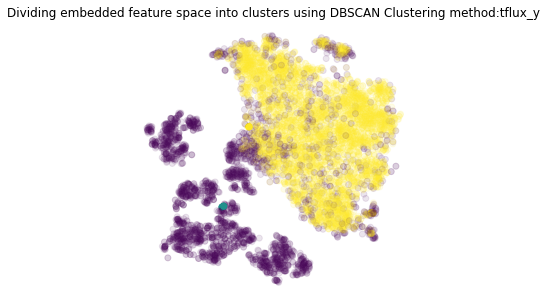

In [136]:
for j in range(num_clust - 1 , -1, -1):
        print("elements in cluster {} {}".format(j, (DBclustering.labels_ 
                                                                 == j).sum()))
pl.figure(figsize=(5,5))
pl.title('Dividing embedded feature space into clusters ' + 
                              'using DBSCAN Clustering method:' + str(col))

#using a color map normalized according to the number of clusters:
# for 3 clusters vmin=0, vmax=2
colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                           for c in DBclustering.labels_])
# changing the alpha (transparency) based on the number of objects in the 
# cluster or some clusters would not be visible
alpha = np.array([0.1 if (DBclustering.labels_ == j).sum() > 200 
                                        else 1.0 for j in DBclustering.labels_])
# setting the alpha channel by replacing the default of the colormap which is 1
colors[:,3] = alpha
    
pl.scatter(X_embedded[:,0], X_embedded[:,1], # alpha = alpha,
               color=colors);
pl.axis('off')
pl.show()


Fig : For eps = $4$ and minimum sample size of $5$, **DBscan** method returns 
$5$ clusters as shown in figure above. The method utilizes density of points to return no. of clusters and returns $5$ clusters. It is not completely consistent with previous clustering method since we saw earlier with **Agglomerative** method that $n_{clusters} = 3$ mapped the data well into embedded data in 2D obtained using t-SNE method. This method is dependent on $eps$ and $minimum ~sample ~size$. Perhaps tuning them will provide a result close to Agglomerative method. The clusters obtained this way didn't have any outlier. 

# what have we learned?...
This was actually very helpful to understand that there are 2 surveys which split into 2 cluster under most cluster parameter choices. Other than that... I am not sure. And this happens a lot to me with clustering to be frank. 
- In many cases above (e.g. AgglomerativeClustering(n_clusters=3).fit(X_scaled) ) the clustring reflected a split that was obvious in the t-SNE visualization of the feature space: a large cluster on the top right of my plot, a more diffuse and structured cluster in the bottom left. This splits the deep drilling fields observations from the regular survey observations. It is good and it makes sense that we get that split, but it is not particularly insightful scientifically cause it tells us about the kind of observations we did, not the nature of the objects.

- In some cases clusters of one (in the Agglomarative clustering) or outliers are identified (DBscan) but in a 79-dimensioanl parameter space it is hard to see what that really means... why is a "outlier" different? In fact this challenge was purposefully designed to have no outliers in the training set (which is what we used) and have outliers in the test set. So our "outliers" should not be outliers. And if we change the parameters in the DBscan they are clustering changes indeed!




# PARTH IIB: Classifying:
Unlike clustering, classifying requires the existance of examples - we are learning by example how to spli tobervations among classes. We already prepared the train and test samples. 

Notice that tree methods do not require scaling or whitening! Why? because they deal with each feature one by one, so they make no assumption about covariance of features (until you try to do feature importance) **you can use the original X for the tree-based classification**

# TASK II.4 We will treat the 2 surveys separately: the general survey, and the deep drilling fields. 

splut the sample into DDF and normal and split each of those into training and test set

**Deliverable: 2 training and 2 test sets, one for DDF and one for the normal survey**



In [67]:
print("breakdown between surveys {} {}".format(
    (metadata.ddf_bool == 1).sum(), (metadata.ddf_bool == 0).sum()))

breakdown between surveys 2116 5732


In [69]:
# Create dataset based on ddf measurements

num_ddf = (metadata.ddf_bool == 1).sum()
print(num_ddf)
print(X[:num_ddf][:].shape)


2116
(2116, 76)


In [0]:
# split the sample into DDF and normal 
# First num_ddf no. of data are set for ddf method
# rest are set for normal method
Xddf = X[:num_ddf][:]
Xnormal = X[num_ddf:][:]
yddf =  y[:num_ddf][:]
ynormal =  y[num_ddf:][:]


then split training and test set

In [0]:
import sklearn
from sklearn.model_selection import train_test_split

X_trainddf, X_testddf, y_trainddf, y_testddf = train_test_split(Xddf, yddf, 
                                                                test_size=0.30)

X_trainnormal, X_testnormal, y_trainnormal, y_testnormal = train_test_split(
    Xnormal, ynormal, test_size=0.30)



## TASK II.5 Classification with Random Forest 
 Below I will use  RandomForest  to classify objects predicting "target" according to the "target" variable of the in the mtadata dataframe for both DDF and normal survey. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
**Deliverable: comment on the score: what does the number I obtained mean?**

## TASK II.6 Use GradientBoosted trees to redo the same classification 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

**Deliverable: the score obtained solving the classification problem with the GBT model and a comparison of the score obtained with the RF**

In [0]:
from sklearn.ensemble import RandomForestClassifier
clfddf = RandomForestClassifier(n_estimators=100, 
                        criterion='gini', max_depth=5).fit(X_trainddf, y_trainddf)
clfnormal = RandomForestClassifier(n_estimators=100, 
                        criterion='gini', max_depth=5).fit(X_trainnormal, y_trainnormal)



In [73]:
clfddf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## measuring the classification performance by using the test score
**Deliverable: comment on the score: what does the number I obtained mean?**

In [75]:
print("Random Forest Classification of training data \n" + 
       "score on DDF {:.2f} and on normal survey {:.2f}".format(
           clfddf.score(X_trainddf, y_trainddf),
           clfnormal.score(X_trainddf, y_trainddf)))



Random Forest Classification of training data 
score on DDF 0.75 and on normal survey 0.66


In [76]:
print("Random Forest Classification on test data \n" + 
       "score on DDF {:.2f} and on normal survey {:.2f}".format(
           clfddf.score(X_testddf, y_testddf),
           clfnormal.score(X_testnormal, y_testnormal)))



Random Forest Classification on test data 
score on DDF 0.73 and on normal survey 0.63


Comment on what the numbers above mean...

Ans  : The score for both test and training set for ddf and normal data have been performed and it can be seen that ddf data performs better on test data set better than normal dataset indicating importance of the feature to be included in our overall model as well. 
In short, the score retuns mean accuracy on test data set and we see ddf dataset performed better with accuracy of $73$ % compared to normal data with $63$%. 

Important link : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Because this is a classification problem, we can build a confusion matrix

Confusion matrix, without normalization
Normalized confusion matrix


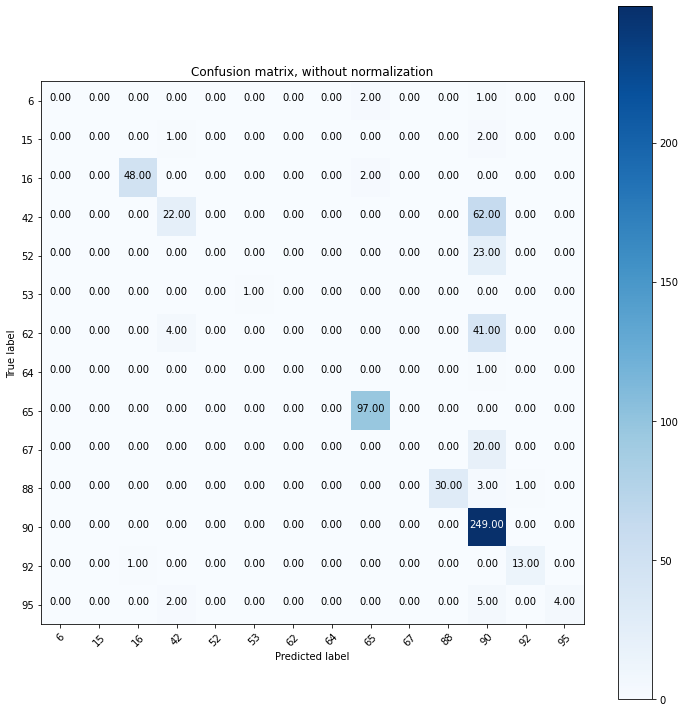

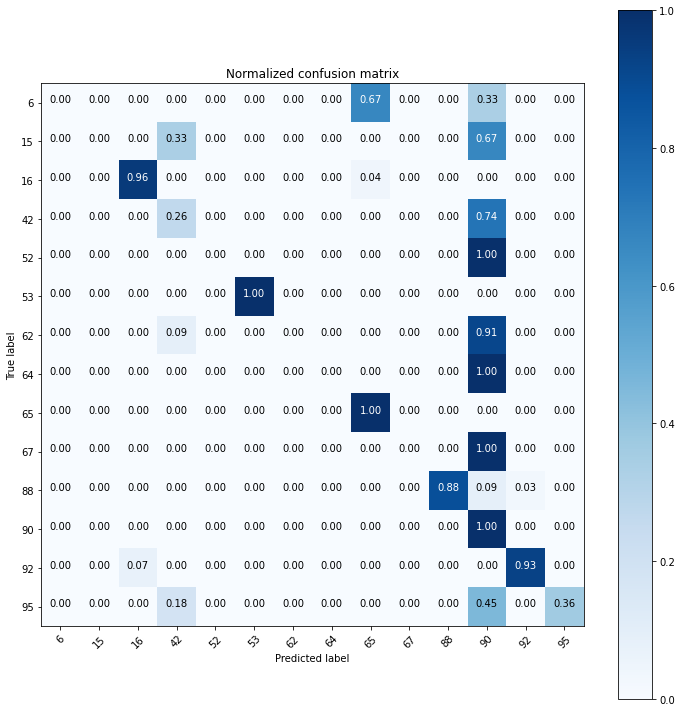

In [77]:
#https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%.2f"%cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(y_testddf, clfddf.predict(X_testddf))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()



Fig 8 : Confusion matrices (top fig : without normalization and bottom fig : with normalization) on test dataset of **ddf** data.
The diagonal elements show the data that were correctly labeled showing comparison between True and predicted label. FOr example, diagonal element (65, 65) shows that $100$ % data of this class were labelled correctly.

Confusion matrix, without normalization
Normalized confusion matrix


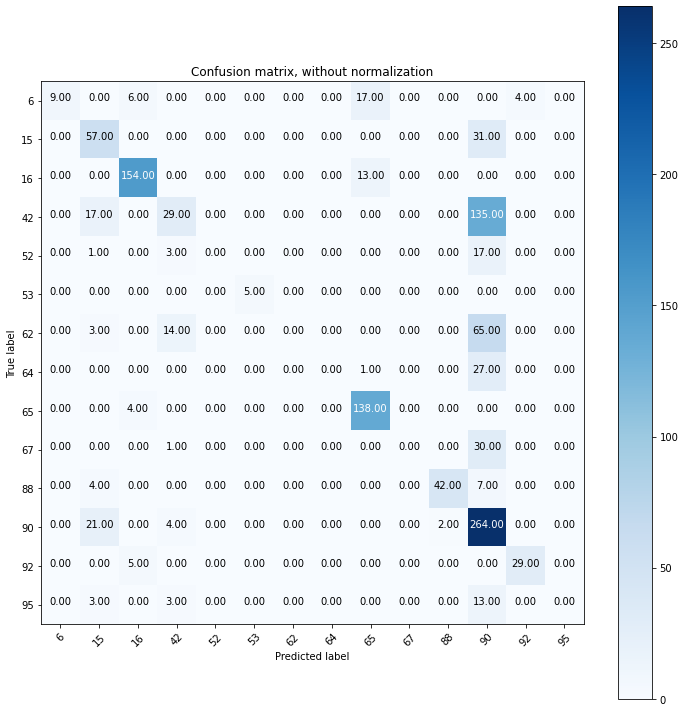

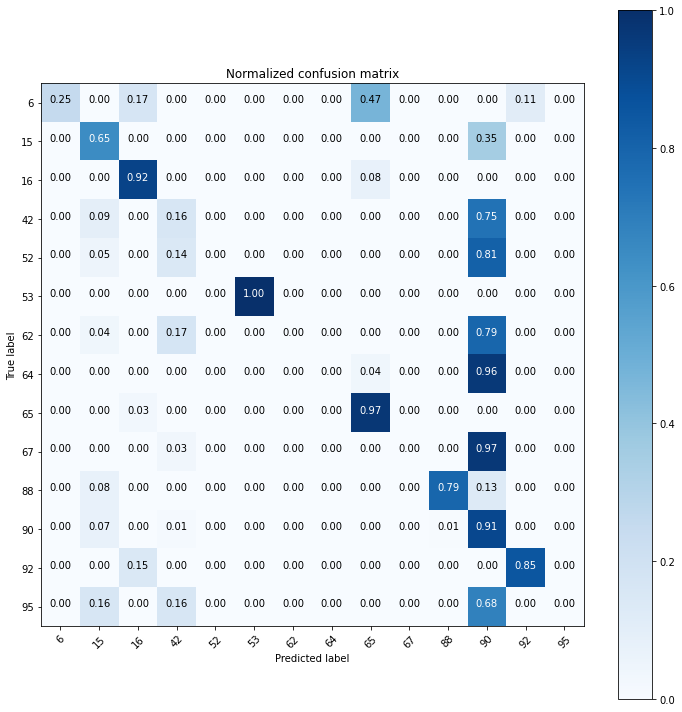

In [0]:
cnf_matrix = sklearn.metrics.confusion_matrix(y_testnormal, clfnormal.predict(X_testnormal))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()



Fig 8 : Confusion matrices (top fig : without normalization and bottom fig : with normalization) on test dataset of **normal** data. The class 53 with diagonal element no. (53, 53), $100$% of the data were labelled correctly. But there are data such as (64, 90) that were labelled wrong with data percentile of $96$%. 





# TASK II.7 take a stab at interpreting this. We will discuss in class how to read this properly on tuesday

## TASK II.6 Use GradientBoosted trees to redo the same classification 


In [88]:
# Checking gradient booster performance for different learning rate 
# on ddf dataset

from sklearn.ensemble import GradientBoostingClassifier
# Setting different learning rate 
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
  gb_clf_ddf = GradientBoostingClassifier(n_estimators = 20, 
                                      learning_rate=learning_rate)
  # grd_ddf = gb_clf_ddf.fit(X_trainddf, y_trainddf)
  print("Learning rate: ", learning_rate)
  print("Accuracy score (training) ddf data: {0:.3f}".format(gb_clf_ddf.score(X_trainddf, 
                                                                  y_trainddf)))
  print("Accuracy score (validation) ddf data: {0:.3f}".format(gb_clf_ddf.score(X_testddf, 
                                                                   y_testddf)))


Learning rate:  0.05
Accuracy score (training) ddf data: 0.816
Accuracy score (validation) ddf data: 0.724
Learning rate:  0.075
Accuracy score (training) ddf data: 0.868
Accuracy score (validation) ddf data: 0.742
Learning rate:  0.1
Accuracy score (training) ddf data: 0.901
Accuracy score (validation) ddf data: 0.740
Learning rate:  0.25
Accuracy score (training) ddf data: 0.975
Accuracy score (validation) ddf data: 0.742
Learning rate:  0.5
Accuracy score (training) ddf data: 0.999
Accuracy score (validation) ddf data: 0.734
Learning rate:  0.75
Accuracy score (training) ddf data: 0.998
Accuracy score (validation) ddf data: 0.713
Learning rate:  1
Accuracy score (training) ddf data: 0.967
Accuracy score (validation) ddf data: 0.657


In [89]:
grd_ddf

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [93]:
# Checking gradient booster performance for different learning rate 
# on normal dataset
for learning_rate in lr_list:
  gb_clf_normal = GradientBoostingClassifier(n_estimators = 20, 
                                      learning_rate=learning_rate)
  # grd_nrml = gb_clf_normal.fit(X_trainnormal, y_trainnormal)
  print("Learning rate: ", learning_rate)
  print("Accuracy score (training) normal data: {0:.3f}".format(gb_clf_normal.score(X_trainnormal, 
                                                                  y_trainnormal)))
  print("Accuracy score (validation) normal data: {0:.3f}".format(gb_clf_normal.score(X_testnormal, 
                                                                   y_testnormal)))


Learning rate:  0.05
Accuracy score (training) normal data: 0.715
Accuracy score (validation) normal data: 0.655
Learning rate:  0.075
Accuracy score (training) normal data: 0.750
Accuracy score (validation) normal data: 0.672
Learning rate:  0.1
Accuracy score (training) normal data: 0.781
Accuracy score (validation) normal data: 0.675
Learning rate:  0.25
Accuracy score (training) normal data: 0.873
Accuracy score (validation) normal data: 0.677
Learning rate:  0.5
Accuracy score (training) normal data: 0.859
Accuracy score (validation) normal data: 0.633
Learning rate:  0.75
Accuracy score (training) normal data: 0.838
Accuracy score (validation) normal data: 0.616
Learning rate:  1
Accuracy score (training) normal data: 0.113
Accuracy score (validation) normal data: 0.106


Note : Similar to Randomforest, gradient booster also shows better accuracy on ddf data compared to normal data. Since gradient booster method depends on learning rate, accuracy on training and test dataset is shown for various learning rate and one may note from both ddf and normal dataet that **learning rate** above $0.1$ is leading to overfitting with an accuracy score of 0.82 on normal training data and 0.607 normal test data for **learning rate** $= 0.75$.

# Extra Credit IV: build a confusion matrix for yout gradient boosted tree model and comment on the result

**Confusion matrix of ddf data  using gradient booster method**





In [0]:
  # Choosing learning rate of 0.1 to avoid overfitting 
  grd_ddf = GradientBoostingClassifier(n_estimators = 20, 
                                  learning_rate=0.1).fit(X_trainddf, y_trainddf)

In [0]:
#https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%.2f"%cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix_grd = sklearn.metrics.confusion_matrix(y_testddf, grd_ddf.predict(X_testddf))

np.set_printoptions(precision=2)


Confusion matrix, without normalization
Normalized confusion matrix


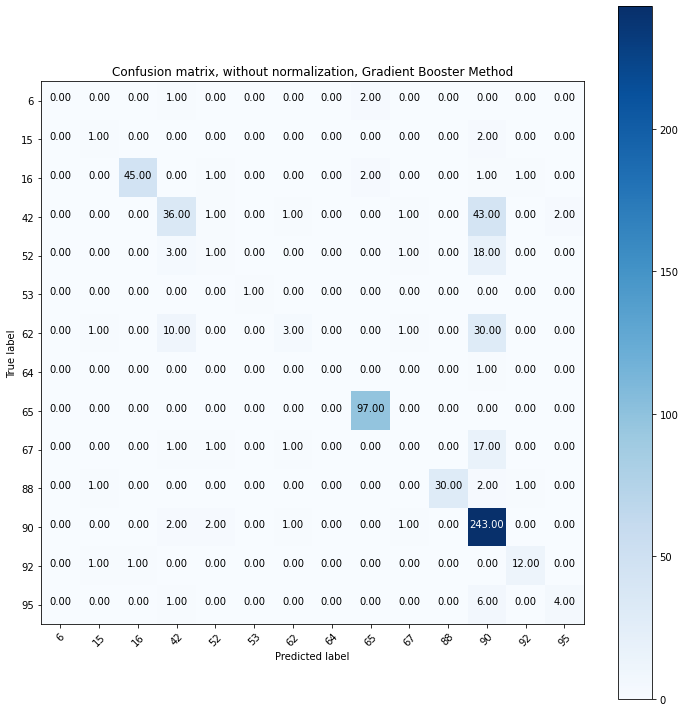

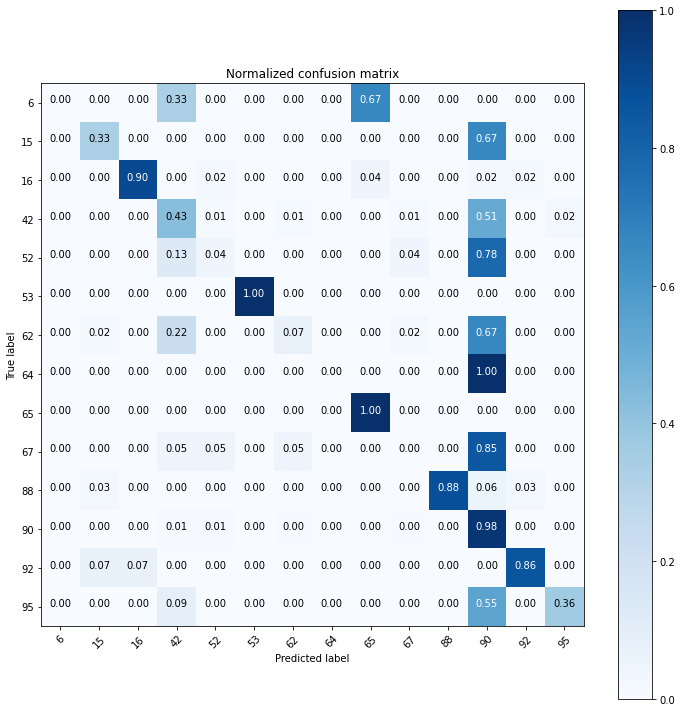

In [99]:

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix_grd, classes=["%d"%i for i in np.unique(y)],
      title='Confusion matrix, without normalization, Gradient Booster Method')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix_grd, classes=["%d"%i for i in np.unique(y)], 
                      normalize=True,
                      title='Normalized confusion matrix')

plt.show()



Fig 8 : Confusion matrices (top fig : without normalization and bottom fig : with normalization) on test dataset of **ddf** data using gradient booster method. The result is consistent with previous confusion matrix calculated using randomforest classifier showing diagonal element (65, 65) with $100$ % data labelled correctly.

**Confusion matrix of normal data using gradient booster method**


Normal data : Choosing learning rate $0.1$

In [0]:
  grd_nrml = GradientBoostingClassifier(n_estimators = 20, 
                                      learning_rate=0.1
                                      ).fit(X_trainnormal, y_trainnormal)

Confusion matrix, without normalization
Normalized confusion matrix


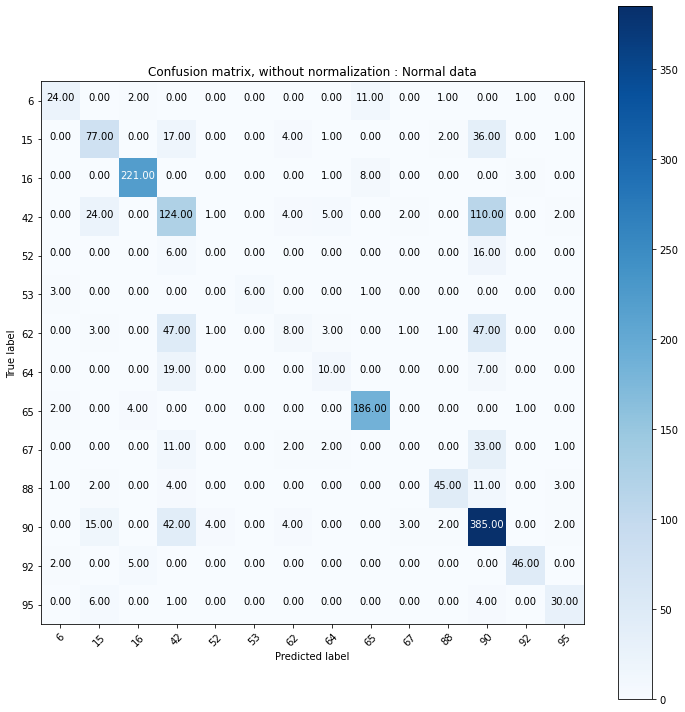

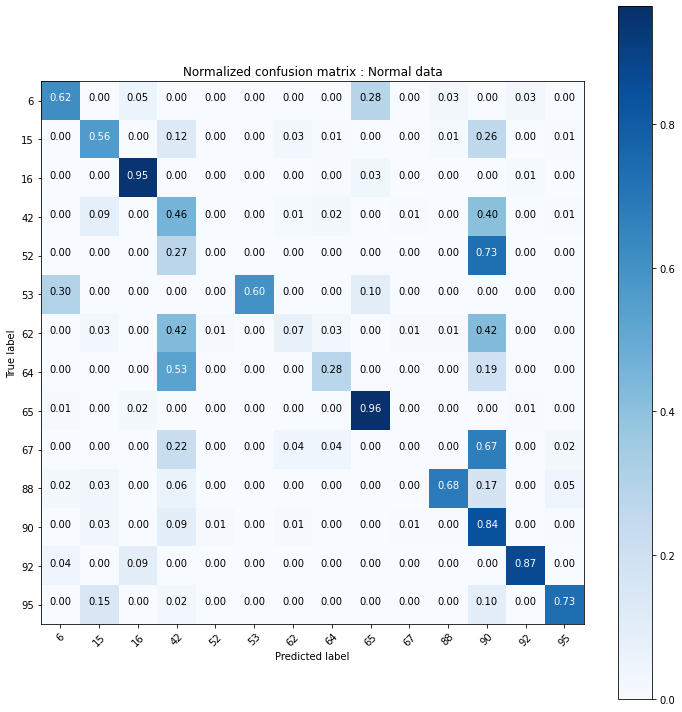

In [95]:
cnf_matrix_grd_nrml = sklearn.metrics.confusion_matrix(y_testnormal, 
                                              grd_nrml.predict(X_testnormal))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix_grd_nrml, classes=["%d"%i for i in np.unique(y)],
                      title='Confusion matrix, without normalization : Normal data')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix_grd_nrml, classes=["%d"%i for i in np.unique(y)], normalize=True,
                      title='Normalized confusion matrix : Normal data')

plt.show()



Fig : Confusion matrices (top fig : without normalization and bottom fig : with normalization) on test dataset of **normal** data. Unlike randomforest (accuracy of $100$ %), class 53 is accurately labelled only $60$ %. But the mislabelling of (64, 90) is reduced to $19$%. The gradient booster method is dependent on learning rate which can have significant effct on output. 





